<a href="https://colab.research.google.com/github/BrianGisemba/MENTAL-HEALTH-TWEETS-CLASSIFICATION/blob/data-augmentation/mental_health_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Overview

Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model.

Data Augmentation techniques in NLP show substantial improvements on datasets with less than 500 observations. We will perform Easy Data Augmentation on the mental health dataset.

In [1]:
# Load the libraries needed 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Loading the Data

In [37]:
mental_df = pd.read_csv('mental_health.csv')
mental_df.head()

,Unnamed: 0,Unnamed: 0.1,user,tweet,location,description,friends_count,followers_count,statuses_count,created_at,retweet_count,hashtags,disorder
0,0,0,TheKenyanPost,SHOCK as a young man climbs on top of a hospit...,"Nairobi, Kenya","News, Politics, Entertainment, Gossip, Feature...",434,52951,356584,2021-08-17 10:33:55,0,[],depression
1,1,1,Goodguy_254,People tend to hide depression under drinking ...,"Nairobi, Kenya",poet\n writer🧾\nsoftware developer🖥️\n program...,2074,2257,1284,2021-08-17 10:20:30,0,[],depression
2,2,2,AlfredLete,@Lily_nganga Depression,Nairobi,"do what is right,not what is easy",8515,13075,37974,2021-08-17 09:32:49,0,[],depression
3,3,3,GeraldNgaoPk7,Itumbi has subjected bloggers in to depression...,"Nairobi, Kenya",Pan-Africanist||NeoMarxistRevolutionary||Inter...,21503,20437,164694,2021-08-17 08:56:26,2,"[{'text': 'ItumbiGhostWorkers', 'indices': [77...",depression
4,4,4,swyma304,Mental health isn’t just anxiety &amp; depress...,"Nairobi, Kenya",Psychiatry Resident. Certified Cognitive Behav...,93,206,594,2021-08-17 08:18:20,1,[],depression


#### Previewing the Data

In [38]:
# Exploring the data 
mental_df.shape

(756, 13)

In [39]:
# loooking for duplicates ?
mental_df.duplicated().sum()

0

There are no duplicates in the Tweets. 

In [40]:
# Checking for null values
mental_df.isna().sum()

Unnamed: 0          0
Unnamed: 0.1        0
user                0
tweet               0
location            3
description        28
friends_count       0
followers_count     0
statuses_count      0
created_at          0
retweet_count       0
hashtags            0
disorder            0
dtype: int64

In [41]:
# dealing with missing data.
mental_df.drop(['description', 'Unnamed: 0.1', 'Unnamed: 0'], 1 , inplace= True)

In [42]:
# Droping all irrelevant collumns
droplist = ['location', 'friends_count', 'user',
       'followers_count', 'statuses_count', 'retweet_count',
       'hashtags']
mental_df.drop(droplist, axis=1, inplace=True)
mental_df.columns

Index(['tweet', 'created_at', 'disorder'], dtype='object')

In [43]:
# Checking the data types of the columns

mental_df.dtypes

tweet         object
created_at    object
disorder      object
dtype: object

In [45]:
# Changing the created_at column into time and date
mental_df.created_at = pd.to_datetime(mental_df.created_at)
mental_df.dtypes

tweet                 object
created_at    datetime64[ns]
disorder              object
dtype: object

# Data Preprocessing

depression       353
anxiety          278
suicidal          59
bipolar           17
austim            14
schizophrenia     14
dementia          12
paranoia           9
Name: disorder, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


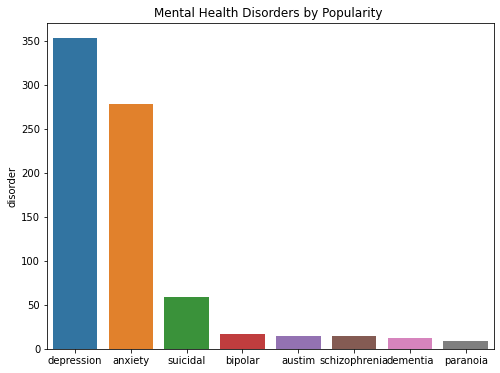

In [46]:
x=mental_df['disorder'].value_counts()
print(x)
plt.figure(figsize = (8,6))
plt.title('Mental Health Disorders by Popularity ')
# plt.xlabel( rotate = 45)
sns.barplot(x.index, x);


In [47]:
mental_df['disorder'].unique()

array(['depression', 'anxiety', 'paranoia', 'schizophrenia', 'suicidal',
       'dementia', 'bipolar', 'austim'], dtype=object)

According to the hashtags the main mental health issues that kenyans are tweeting about are 
- Depression 
- Anxiety 
- Paranoia
- Schizophrenia
- Suicidal
- Dementia  
- Bipolar  
- Autism 

In [48]:
mental_df['year'] = mental_df['created_at'].dt.year
mental_df['month'] = mental_df['created_at'].dt.month
mental_df.head()

,tweet,created_at,disorder,year,month
0,SHOCK as a young man climbs on top of a hospit...,2021-08-17 10:33:55,depression,2021,8
1,People tend to hide depression under drinking ...,2021-08-17 10:20:30,depression,2021,8
2,@Lily_nganga Depression,2021-08-17 09:32:49,depression,2021,8
3,Itumbi has subjected bloggers in to depression...,2021-08-17 08:56:26,depression,2021,8
4,Mental health isn’t just anxiety &amp; depress...,2021-08-17 08:18:20,depression,2021,8


In [49]:
# Checking the number of disorders per year
mental_df.year.astype('category').value_counts()


2021    756
Name: year, dtype: int64

In [51]:
# We need to remove some unnecessary column that will not help with classification. 
unnecessary = ['created_at', 'year', 'month']
mental_df.drop(unnecessary, axis=1, inplace=True)
mental_df.head()

,tweet,disorder
0,SHOCK as a young man climbs on top of a hospit...,depression
1,People tend to hide depression under drinking ...,depression
2,@Lily_nganga Depression,depression
3,Itumbi has subjected bloggers in to depression...,depression
4,Mental health isn’t just anxiety &amp; depress...,depression


In [52]:
mental_df.disorder.value_counts()

depression       353
anxiety          278
suicidal          59
bipolar           17
austim            14
schizophrenia     14
dementia          12
paranoia           9
Name: disorder, dtype: int64

In [53]:
# We need to labelEncode the data. 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mental_df['disorder'] = le.fit_transform(mental_df.disorder)
mental_df.sample (5)

,tweet,disorder
82,"In USA you see names like Bush, Stone yet they...",4
281,"""The Skeleton of a habit alone upholds the hum...",4
690,@_fels1 Suicidal in my book,7
484,@Vince_Muema Knowing our next president will e...,0
106,@Arsenal just imagining 9 months of this and d...,4


In [54]:
mental_df.head(2)

,tweet,disorder
0,SHOCK as a young man climbs on top of a hospit...,4
1,People tend to hide depression under drinking ...,4


In [61]:
print(f"Total number of tweets for augmenting is : {len(mental_df.tweet)}")

Total number of tweets for augmenting is : 756


We will perform Easy Data Augmentation using the below procedures:
1. SR : Synonym Replacement
2. RD : Random Deletion
3. RS : Random Swap
4. RI : Random Insertion

#### 1. SR : Synonym Replacement

In [74]:
# create a function that will get the synonyms
from nltk.corpus import wordnet

def get_synonyms(word):
  synonyms = set()

  for syn in wordnet.synsets(word):
    for l in syn.lemmas():
      synonym = l.name().replace("_", " ").replace("-", " ").lower()
      synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
      synonyms.add(synonym) 
  if word in synonyms:
    synonyms.remove(word)
    
  return list(synonyms)

The get_synonyms funtion will return pre-processed list of synonyms of given word. Now we will replace the words with synonyms.

In [75]:
# Replacing the words with synonyms
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = []
for w in stopwords.words('english'):
  stop_words.append(w)

print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [83]:
# import the random and wordnet library
import random

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [77]:
# Create a function for synonym replacement
def synonym_replacement(words, n):
  words = words.split()

  new_words = words.copy()
  random_word_list = list(set([word for word in words if word not in stop_words]))
  random.shuffle(random_word_list)
  num_replaced = 0

  for random_word in random_word_list:
    synonyms = get_synonyms(random_word)

    if len(synonyms) >= 1:
      synonym = random.choice(list(synonyms))
      new_words = [synonym if word == random_word else word for word in new_words]
      num_replaced += 1
        
    if num_replaced >= n: #only replace up to n words
      break

  sentence = ' '.join(new_words)

  return sentence

In [78]:
mental_df['tweet'].iloc[3]

'Itumbi has subjected bloggers in to depression. He ought to be behind bars.\n\n#ItumbiGhostWorkers https://t.co/iQ0881MjGD'

In [84]:
print(f"Example of Synonym Replacement: {synonym_replacement(mental_df['tweet'].iloc[3],3)}")

Example of Synonym Replacement: Itumbi has submit blogger in to depression. he ought to be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD


In [85]:
# Preview one tweet from the dataset
trial_sent = mental_df['tweet'][3]
print(trial_sent)

Itumbi has subjected bloggers in to depression. He ought to be behind bars.

#ItumbiGhostWorkers https://t.co/iQ0881MjGD


In [86]:
# Create 3 Augmented Sentences per data 

for n in range(3):
  print(f" Example of Synonym Replacement: {synonym_replacement(trial_sent,n)}")

 Example of Synonym Replacement: Itumbi has subjugate bloggers in to depression. He ought to be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
 Example of Synonym Replacement: Itumbi has subjected blogger in to depression. He ought to be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
 Example of Synonym Replacement: Itumbi has subject bloggers in to depression. He ought to be can bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD


Now we are able to augment the Data. We can create New colums for the Same text-id in the entire mental - Dataset

#### 2.Random Deletion (RD)

In Random Deletion, we randomly delete a word if a uniformly generated number between 0 and 1 is smaller than a pre-defined threshold. This allows for a random deletion of some words of the sentence.

In [87]:
# Create a function for random deletion of words
def random_deletion(words, p):
  words = words.split()
    
  # If there's only one word, don't delete it
  if len(words) == 1:
    return words

  # randomly delete words with probability p
  new_words = []
  for word in words:
    r = random.uniform(0, 1)
  if r > p:
    new_words.append(word)

  #if you end up deleting all words, just return a random word
  if len(new_words) == 0:
    rand_int = random.randint(0, len(words)-1)
    return [words[rand_int]]

  sentence = ' '.join(new_words)
    
  return sentence

Lets test out this Augmentation with our test_sample.

In [99]:
print(random_deletion(trial_sent,-1))
print(random_deletion(trial_sent,16))
print(random_deletion(trial_sent,7))

https://t.co/iQ0881MjGD
['subjected']
['to']


#### 3. Random Swap (RS)

In [100]:
# Create a function that will Swap the words
def swap_word(new_words):
  random_idx_1 = random.randint(0, len(new_words)-1)
  random_idx_2 = random_idx_1
  counter = 0
    
  while random_idx_2 == random_idx_1:
    random_idx_2 = random.randint(0, len(new_words)-1)
    counter += 1
        
  if counter > 3:
    return new_words
    
  new_words[random_idx_1], new_words[random_idx_2] = new_words[random_idx_2], new_words[random_idx_1] 
  return new_words

In [101]:
# Create a function for random swap
def random_swap(words, n):
    
  words = words.split()
  new_words = words.copy()
  # n is the number of words to be swapped
  for _ in range(n):
    new_words = swap_word(new_words)
        
  sentence = ' '.join(new_words)
    
  return sentence

In [102]:
# Preview three sentences of the trial sample after applying random swap
print(random_swap(trial_sent,1))
print(random_swap(trial_sent,2))
print(random_swap(trial_sent,3))

Itumbi has subjected bloggers in to behind He ought to be depression. bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
to has subjected bloggers He to depression. in ought Itumbi be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
Itumbi to subjected bloggers in https://t.co/iQ0881MjGD depression. He ought to be has bars. #ItumbiGhostWorkers behind


#### 4. Random Insertion (RI)

In [103]:
# Randomly insert synonyms of a word at a random position.
def random_insertion(words, n):
    
  words = words.split()
  new_words = words.copy()
    
  for _ in range(n):
    add_word(new_words)

  sentence = ' '.join(new_words)
  return sentence

def add_word(new_words):
    
  synonyms = []
  counter = 0
    
  while len(synonyms) < 1:
    random_word = new_words[random.randint(0, len(new_words)-1)]
    synonyms = get_synonyms(random_word)
    counter += 1
    if counter >= 10:
      return
        
  random_synonym = synonyms[0]
  random_idx = random.randint(0, len(new_words)-1)
  new_words.insert(random_idx, random_synonym)

In [104]:
# Print three sentences of the text sample
print(random_insertion(trial_sent,1))
print(random_insertion(trial_sent,2))
print(random_insertion(trial_sent,3))

Itumbi has subjected bloggers in to depression. He ought to be behind bars. indiana #ItumbiGhostWorkers https://t.co/iQ0881MjGD
Itumbi has hindquarters subjected bloggers in to depression. He personify ought to be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
hold Itumbi has hold subjected bloggers in to blogger depression. He ought to be behind bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD


In [105]:
# Create a function for all the four steps above
def aug(sent,n,p):
    print(f" Original Sentence : {sent}")
    print(f" SR Augmented Sentence : {synonym_replacement(sent,n)}")
    print(f" RD Augmented Sentence : {random_deletion(sent,p)}")
    print(f" RS Augmented Sentence : {random_swap(sent,n)}")
    print(f" RI Augmented Sentence : {random_insertion(sent,n)}")

In [106]:
# Apply the function to the trial text
aug(trial_sent,4,0.3)

 Original Sentence : Itumbi has subjected bloggers in to depression. He ought to be behind bars.

#ItumbiGhostWorkers https://t.co/iQ0881MjGD
 SR Augmented Sentence : Itumbi has subject blogger in to depression. helium ought to be fundament bars. #ItumbiGhostWorkers https://t.co/iQ0881MjGD
 RD Augmented Sentence : https://t.co/iQ0881MjGD
 RS Augmented Sentence : depression. He subjected bloggers Itumbi https://t.co/iQ0881MjGD in has ought to be behind bars. #ItumbiGhostWorkers to
 RI Augmented Sentence : hindquarters Itumbi has subjected bloggers in to indiana depression. He ought to be behind bars. helium #ItumbiGhostWorkers indiana https://t.co/iQ0881MjGD


From the above results, it is evident that Easy Data Augmentation doesn't help much. It is good to try other methods of data augmentation.